In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import conorm as norm
from sklearn.manifold import TSNE
import seaborn as sns
from glob import glob

In [2]:
###REad new gene expression data
gen_ex_new = pd.read_csv('/user/sina.garazhian/u12203/vst transformed expression matrix PDO.txt', sep = '\t')
gen_ex_new.insert(0, 'Gene', gen_ex_new.index)
gen_ex_new

Gene  TM014_Organoid_Pan001  TM016_Organoid_Pan003  \
A1BG          A1BG               5.336545               5.318026   
A1BG-AS1  A1BG-AS1               5.419964               5.695247   
A1CF          A1CF               7.067815               5.665453   
A2M            A2M               6.664673               5.532958   
A2M-AS1    A2M-AS1               5.558714               5.829960   
...            ...                    ...                    ...   
ZYG11A      ZYG11A               4.789310               5.026816   
ZYG11B      ZYG11B               9.338415               9.791039   
ZYX            ZYX              12.072943              11.185711   
ZZEF1        ZZEF1              10.188955              11.947230   
ZZZ3          ZZZ3              10.045993              10.444228   

          TM017_Organoid_Pan004  TM023_Organoid_Pan002  TM025_Organoid_Pan013  \
A1BG                   4.789310               4.789310               5.099289   
A1BG-AS1               5.148995               4.789310               5.654716   
A1CF                   9.414060               5.973398               5.324174   
A2M                    5.503238               5.139939               6.219491   
A2M-AS1                5.585531               5.283968               5.477242   
...                         ...                    ...                    ...   
ZYG11A                 5.148995               4.789310               5.753396   
ZYG11B                 9.455542               9.842089               9.664828   
ZYX                   12.245427              11.178932              11.590205   
ZZEF1                 10.889226              10.657280              10.202748   
ZZZ3                   9.881723              10.374620              10.088460   

          TM026_Organoid_Pan016  TM027_Organoid_Pan017  TM028_Organoid_Pan018  \
A1BG                   4.789310               4.789310               4.789310   
A1BG-AS1               5.278072               5.138699               5.157612   
A1CF                   7.643431               6.321324               7.740772   
A2M                    6.913129               5.439051               4.789310   
A2M-AS1                5.072394               5.818103               5.369315   
...                         ...                    ...                    ...   
ZYG11A                 4.789310               5.036667               5.157612   
ZYG11B                 9.908840               8.856528              10.473571   
ZYX                   11.872911              10.806840              11.871484   
ZZEF1                 10.779202              10.036647              11.284162   
ZZZ3                  10.232231               9.452040              10.147892   

          TM029_Organoid_Pan021  ...  TM067_Organoid_Pan072  \
A1BG                   5.053854  ...               4.789310   
A1BG-AS1               5.162912  ...               4.789310   
A1CF                  10.314372  ...               7.204841   
A2M                    4.789310  ...               5.248366   
A2M-AS1                5.654892  ...               5.114594   
...                         ...  ...                    ...   
ZYG11A                 5.053854  ...               4.789310   
ZYG11B                 9.896800  ...              10.502770   
ZYX                   12.294821  ...              12.116751   
ZZEF1                 11.073239  ...              11.054811   
ZZZ3                  10.130900  ...              10.359694   

          TM068_Organoid_Pan074  TM076_Organoid_Pan083  TM077_Organoid_Pan084  \
A1BG                   5.013871               4.789310               4.789310   
A1BG-AS1               5.013871               5.164462               4.789310   
A1CF                   6.004622               8.129775               7.576449   
A2M                    5.237086               7.369653               8.469311   
A2M-AS1                5.674510               5.318381               5.579754   
...     

In [3]:
##Read gene expression data for panc cancer
gen_ex = pd.read_csv("pdo_genetic_data/RNA/pancrea/KFO/vst_transformed_expression_matrix_PDO.csv", sep = "\t")
gen_ex = gen_ex.T
gen_ex.head()

A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1  \
TM014_Organoid_Pan001  5.336545  5.419964  7.067815  6.664673  5.558714   
TM016_Organoid_Pan003  5.318026  5.695247  5.665453  5.532958  5.829960   
TM017_Organoid_Pan004  4.789310  5.148995  9.414060  5.503238  5.585531   
TM023_Organoid_Pan002  4.789310  4.789310  5.973398  5.139939  5.283968   
TM025_Organoid_Pan013  5.099289  5.654716  5.324174  6.219491  5.477242   

                          A2ML1   A3GALT2    A4GALT     A4GNT       AAAS  ...  \
TM014_Organoid_Pan001  4.789310  4.789310  7.915163  7.882267  10.069626  ...   
TM016_Organoid_Pan003  5.455892  5.413521  9.902894  5.568416  10.617758  ...   
TM017_Organoid_Pan004  4.789310  4.789310  9.448413  6.002465  10.133411  ...   
TM023_Organoid_Pan002  5.139939  4.789310  9.127944  5.973398  10.158441  ...   
TM025_Organoid_Pan013  5.099289  4.789310  7.940723  4.789310  10.463366  ...   

                          ZWILCH      ZWINT      ZXDA      ZXDB       ZXDC  \
TM014_Organoid_Pan001   8.557402   9.822390  6.601222  8.681079   9.450775   
TM016_Organoid_Pan003   7.811578   9.916425  7.337544  9.196086  10.549964   
TM017_Organoid_Pan004   8.984285   9.911816  6.445084  8.206812   9.267797   
TM023_Organoid_Pan002  10.398510  11.455552  6.825215  8.111590   9.247952   
TM025_Organoid_Pan013   9.897994  10.966854  6.646947  8.253846   9.129597   

                         ZYG11A    ZYG11B        ZYX      ZZEF1       ZZZ3  
TM014_Organoid_Pan001  4.789310  9.338415  12.072943  10.188955  10.045993  
TM016_Organoid_Pan003  5.026816  9.791039  11.185711  11.947230  10.444228  
TM017_Organoid_Pan004  5.148995  9.455542  12.245427  10.889226   9.881723  
TM023_Organoid_Pan002  4.789310  9.842089  11.178932  10.657280  10.374620  
TM025_Organoid_Pan013  5.753396  9.664828  11.590205  10.202748  10.088460  

[5 rows x 19446 columns]

In [4]:
##filtering patients, only keep panc cancer related ones
pan_list = ["Pan002", "Pan016", "Pan017", "Pan041", "Pan051", "Pan054", "Pan058", "Pan070", "Pan074"] ##new potential sample , 'Pan068'
boole = [i.split("_")[-1] in pan_list for i in gen_ex.index]


In [5]:
gen_ex.index

Index(['TM014_Organoid_Pan001', 'TM016_Organoid_Pan003',
       'TM017_Organoid_Pan004', 'TM023_Organoid_Pan002',
       'TM025_Organoid_Pan013', 'TM026_Organoid_Pan016',
       'TM027_Organoid_Pan017', 'TM028_Organoid_Pan018',
       'TM029_Organoid_Pan021', 'TM033_Organoid_Pan025',
       'TM037_Organoid_Pan035', 'TM039_Organoid_Pan041',
       'TM042_Organoid_Pan044', 'TM046_Organoid_Pan049',
       'TM047_Organoid_Pan051', 'TM048_Organoid_Pan052',
       'TM049_Organoid_Pan053', 'TM050_Organoid_Pan054',
       'TM053_Organoid_Pan058', 'TM055_Organoid_Pan060',
       'TM056_Organoid_Pan061', 'TM060_Organoid_Pan065',
       'TM061_Organoid_Pan066', 'TM063_Organoid_Pan068',
       'TM065_Organoid_Pan070', 'TM066_Organoid_Pan071',
       'TM067_Organoid_Pan072', 'TM068_Organoid_Pan074',
       'TM076_Organoid_Pan083', 'TM077_Organoid_Pan084',
       'TM078_Organoid_Pan085', 'TM080_Organoid_Pan088',
       'TM081_Organoid_Pan089', 'TM084_Organoid_Pan091',
       'TM086_Organoid_Pan093',

In [6]:
##PCA for pancrea

gen_ex_fil = gen_ex.loc[boole, :]
x = StandardScaler().fit_transform(gen_ex_fil)
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
var = pca.explained_variance_ratio_
var

array([0.22100075, 0.17890614, 0.16125741, 0.13407219, 0.09910122,
       0.08417276, 0.07267525, 0.04881429])

In [7]:
gen_ex_fil

A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1  \
TM023_Organoid_Pan002  4.789310  4.789310  5.973398  5.139939  5.283968   
TM026_Organoid_Pan016  4.789310  5.278072  7.643431  6.913129  5.072394   
TM027_Organoid_Pan017  4.789310  5.138699  6.321324  5.439051  5.818103   
TM039_Organoid_Pan041  5.625095  6.480897  5.889748  7.547030  5.487653   
TM047_Organoid_Pan051  4.789310  4.789310  5.300736  6.578740  6.011715   
TM050_Organoid_Pan054  4.789310  4.789310  6.681866  5.091552  5.091552   
TM053_Organoid_Pan058  5.237355  5.583939  5.559297  5.388527  5.653257   
TM065_Organoid_Pan070  4.789310  4.789310  5.820949  5.160843  5.313305   
TM068_Organoid_Pan074  5.013871  5.013871  6.004622  5.237086  5.674510   

                          A2ML1   A3GALT2    A4GALT     A4GNT       AAAS  ...  \
TM023_Organoid_Pan002  5.139939  4.789310  9.127944  5.973398  10.158441  ...   
TM026_Organoid_Pan016  5.072394  4.789310  8.157166  5.278072   9.879670  ...   
TM027_Organoid_Pan017  7.648273  4.789310  6.715168  7.088100  10.040003  ...   
TM039_Organoid_Pan041  6.870845  5.487653  7.130702  5.121005  10.324255  ...   
TM047_Organoid_Pan051  5.232792  5.046025  8.848533  5.300736  10.249066  ...   
TM050_Organoid_Pan054  5.215970  4.789310  9.343772  4.789310   9.375923  ...   
TM053_Organoid_Pan058  6.544659  5.279729  7.915315  5.994135  10.267695  ...   
TM065_Organoid_Pan070  5.052386  4.789310  6.689538  4.789310   9.677232  ...   
TM068_Organoid_Pan074  5.589498  4.789310  7.801286  5.700894   9.911078  ...   

                          ZWILCH      ZWINT      ZXDA      ZXDB       ZXDC  \
TM023_Organoid_Pan002  10.398510  11.455552  6.825215  8.111590   9.247952   
TM026_Organoid_Pan016   9.199765  10.079590  6.483518  8.657270   9.253883   
TM027_Organoid_Pan017   9.697206  11.023981  7.296339  8.916347  10.085104   
TM039_Organoid_Pan041   8.794758  10.073001  7.314162  8.422195  10.389687   
TM047_Organoid_Pan051   9.733865  10.135367  7.064650  9.536276  10.237567   
TM050_Organoid_Pan054   7.998488   7.522905  7.205237  8.735522   9.492910   
TM053_Organoid_Pan058  10.334735  11.792556  7.225631  8.516310   9.809864   
TM065_Organoid_Pan070   8.955162   9.818125  7.271877  9.712579   9.936977   
TM068_Organoid_Pan074   9.790382  11.170676  7.382476  8.753145  10.579004   

                         ZYG11A     ZYG11B        ZYX      ZZEF1       ZZZ3  
TM023_Organoid_Pan002  4.789310   9.842089  11.178932  10.657280  10.374620  
TM026_Organoid_Pan016  4.789310   9.908840  11.872911  10.779202  10.232231  
TM027_Organoid_Pan017  5.036667   8.856528  10.806840  10.036647   9.452040  
TM039_Organoid_Pan041  5.121005   9.810402   9.305011  11.030648  10.849622  
TM047_Organoid_Pan051  4.789310   8.926345  10.759329  10.559768  10.452646  
TM050_Organoid_Pan054  4.789310   9.652282  12.566326  11.052044   9.933425  
TM053_Organoid_Pan058  5.073360  10.289563  10.225532  10.157844  10.526344  
TM065_Organoid_Pan070  4.789310   9.086107  10.114369  11.472373  11.132936  
TM068_Organoid_Pan074  5.106569   8.683880  11.082750   9.533371   9.577195  

[9 rows x 19446 columns]

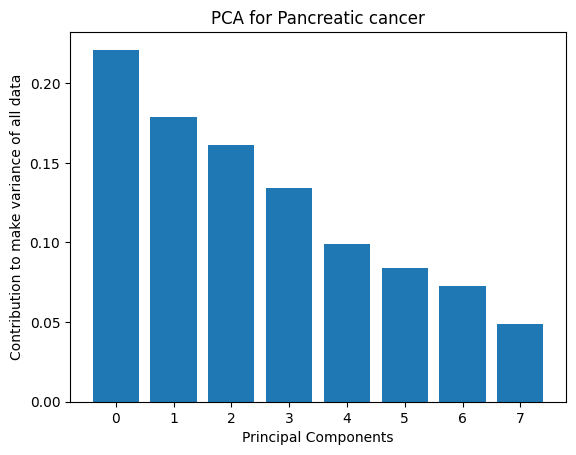

In [8]:
plt.bar([i for i in range(len(var))], var)
plt.title('PCA for Pancreatic cancer')
plt.xlabel('Principal Components')
plt.ylabel('Contribution to make variance of all data')
plt.show()

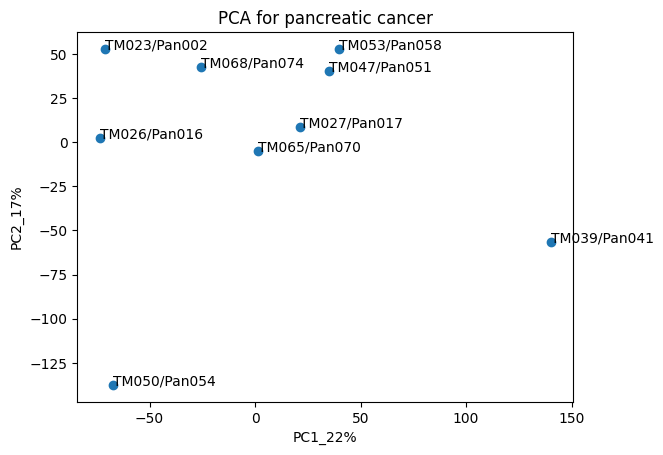

In [9]:

fig, ax = plt.subplots()
x_1 = principalComponents[:,0]
y_1 =  principalComponents[:,1]
ax.scatter(x_1 ,y_1)
for i, txt in enumerate([i.split('_')[0] + '/' + i.split('_')[2] for i in gen_ex_fil.index]):
    ax.annotate(txt, (x_1[i], y_1[i]))
plt.xlabel("PC1_{}%".format(int(var[0] * 100)))
plt.ylabel("PC2_{}%".format(int(var[1] * 100)))
plt.title('PCA for pancreatic cancer')
plt.show()

In [10]:
weights_limit.shape

NameError: name 'weights_limit' is not defined

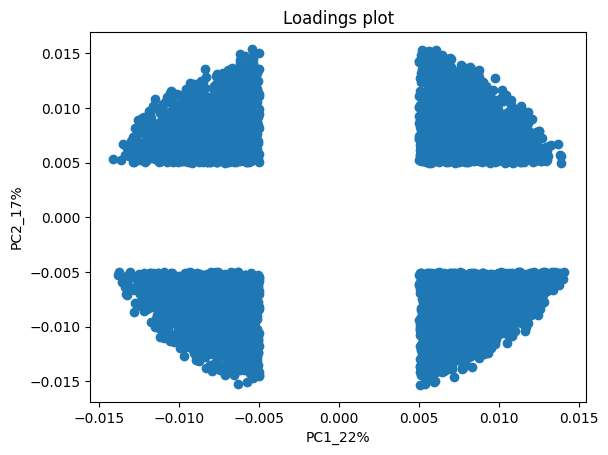

In [11]:
##loadding plot
weights = pca.components_
constraints = ((abs(weights[0,:]) > 0.005) * (abs(weights[1,:]) > 0.005))
weights_limit = weights[:, constraints]
fig, ax = plt.subplots()
selected_genes = gen_ex_fil.columns[constraints]
ax.scatter(weights_limit[0,:], weights_limit[1,:])
#for i, txt in enumerate([i for i in gen_ex_fil.columns[constraints]]):
#    ax.annotate(txt, (weights_limit[0, i], weights_limit[1, i]))
plt.xlabel("PC1_{}%".format(int(var[0] * 100)))
plt.ylabel("PC2_{}%".format(int(var[1] * 100)))
plt.title('Loadings plot')
plt.show()

In [12]:
hallmark_gene_sets = pd.read_csv('/user/sina.garazhian/u12203/h.all.v2024.1.Hs.symbols.gmt', sep= '\t', header=None)
hallmark_gene_sets.head()
tmp_lens = []
for i in hallmark_gene_sets[0]:
    #print(i)
    hallmark_genes = hallmark_gene_sets.loc[hallmark_gene_sets[0] == i, :].values[:,2:].ravel()
    hallmark_genes = hallmark_genes[~pd.isnull(hallmark_genes)]
    commons = np.intersect1d(hallmark_genes, selected_genes)
    tmp_lens.append(len(commons)/ len(hallmark_genes))



In [13]:
len(tmp_lens)

0

In [13]:
c = pd.DataFrame({'gene set' : hallmark_gene_sets[0].values.ravel(), 'Proportion' : tmp_lens})
c.to_csv('/user/sina.garazhian/u12203/genes_in_pca.csv')
c.head()

gene set  Proportion
0         HALLMARK_ADIPOGENESIS    0.275000
1  HALLMARK_ALLOGRAFT_REJECTION    0.190000
2    HALLMARK_ANDROGEN_RESPONSE    0.267327
3         HALLMARK_ANGIOGENESIS    0.166667
4      HALLMARK_APICAL_JUNCTION    0.285000

In [14]:
max(tmp_lens)

0.42857142857142855

Genset enrichment analysis
References:
https://www.pnas.org/doi/full/10.1073/pnas.0506580102


In [ ]:
!pip install gseapy

for Folfirinox

In [15]:
import pandas as pd
##Preparing the viability measurments. getting average across three replicates
viab_data = pd.read_csv("/user/sina.garazhian/u12203/viability_data/pancrea/Folfirinox.txt", sep = '\t')
def prepare_viab(viab_df, rep = 3):
    new_viab = pd.DataFrame()
    column_uniq = list(set([i.split('.')[0][:3].capitalize() + '0' + i.split('.')[0][3:-1].capitalize() for i in viab_data.columns[1:]]))
    new_viab['dosage'] = viab_data['[nM]']
    for i in column_uniq:
        new_viab[i] = viab_data[i[0:3].upper() + i[4:] + 'T'] + sum([viab_data[i[0:3].upper() + i[4:] + 'T.{}'.format(j)] for j in range(1,rep)])
        new_viab[i]/=3
    new_viab_sorted = new_viab.reindex(sorted(new_viab.columns), axis=1)
    return(new_viab_sorted)
new_viab_sorted = prepare_viab(viab_data)
new_viab_sorted

Pan002      Pan016      Pan017      Pan041      Pan051      Pan054  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1  113.296333   61.754877  107.439877   96.462900  106.089380  133.040703   
2   82.052453   85.964393   95.976923   98.137147   95.347220  108.966553   
3   67.376293   81.379130   95.357917   40.539497   71.875400  116.986403   
4   54.567190   43.167160   71.396433   11.111844   44.358740   79.369710   
5   38.175630   34.997813   68.761137    7.933576   40.181423   72.710933   
6   16.103900   29.117709   43.413717    5.566828   17.667945   48.090257   
7    5.088243   27.599753   30.439360    4.534520   14.833397   23.638747   

       Pan058      Pan070      Pan074  dosage  
0  100.000000  100.000000  100.000000       0  
1  117.515110   79.356397  106.513567      14  
2   83.428660  109.997887   72.855977      41  
3   33.745980   80.802653   82.868873     123  
4   19.288487   88.776133   51.057553     370  
5   15.203510   61.463907   51.253263    1111  
6    6.225535   22.720797    1.464480    3333  
7    6.465971   27.995240    3.953516   10000

In [25]:
##Creating the phenotype list
def create_list(data, dose, thresh = 50):
    #emp_list = [i for i in data.columns[1:] if data.loc[data['dosage'] == dose,i] >= thresh]
    final_list = []
    for i in data.columns[0:-1]:
        if np.mean(data.loc[data['dosage'].isin(dose),i].values) >= thresh:
            final_list.append('up')
        else:
            final_list.append('down')
    return(final_list)
li = create_list(new_viab_sorted, [1111])
li

['down', 'down', 'up', 'down', 'down', 'up', 'down', 'up', 'up']

In [26]:
##Preparing the gene expression data.
gen_ex_fil_trans = gen_ex_fil.T
gen_ex_fil_trans.insert(0, 'Gene', gen_ex_fil_trans.index)
gen_ex_fil_trans.index = range(gen_ex_fil_trans.shape[0])
gen_ex_fil_trans.columns = ["Gene", "Pan002", "Pan016", "Pan017", "Pan041", "Pan051", "Pan054", "Pan058", "Pan070", "Pan074"]
gen_ex_fil_trans

Gene     Pan002     Pan016     Pan017     Pan041     Pan051  \
0          A1BG   4.789310   4.789310   4.789310   5.625095   4.789310   
1      A1BG-AS1   4.789310   5.278072   5.138699   6.480897   4.789310   
2          A1CF   5.973398   7.643431   6.321324   5.889748   5.300736   
3           A2M   5.139939   6.913129   5.439051   7.547030   6.578740   
4       A2M-AS1   5.283968   5.072394   5.818103   5.487653   6.011715   
...         ...        ...        ...        ...        ...        ...   
19441    ZYG11A   4.789310   4.789310   5.036667   5.121005   4.789310   
19442    ZYG11B   9.842089   9.908840   8.856528   9.810402   8.926345   
19443       ZYX  11.178932  11.872911  10.806840   9.305011  10.759329   
19444     ZZEF1  10.657280  10.779202  10.036647  11.030648  10.559768   
19445      ZZZ3  10.374620  10.232231   9.452040  10.849622  10.452646   

          Pan054     Pan058     Pan070     Pan074  
0       4.789310   5.237355   4.789310   5.013871  
1       4.789310   5.583939   4.789310   5.013871  
2       6.681866   5.559297   5.820949   6.004622  
3       5.091552   5.388527   5.160843   5.237086  
4       5.091552   5.653257   5.313305   5.674510  
...          ...        ...        ...        ...  
19441   4.789310   5.073360   4.789310   5.106569  
19442   9.652282  10.289563   9.086107   8.683880  
19443  12.566326  10.225532  10.114369  11.082750  
19444  11.052044  10.157844  11.472373   9.533371  
19445   9.933425  10.526344  11.132936   9.577195  

[19446 rows x 10 columns]

In [18]:
import gseapy as gp
###single sample gene set enrichment analysis
reactome = '/user/sina.garazhian/u12203/ReactomePathways.gmt'
ss = gp.ssgsea(data=gen_ex_fil_trans,
               gene_sets='/user/sina.garazhian/u12203/h.all.v2024.1.Hs.symbols.gmt',
               outdir=None,
               sample_norm_method='rank', # choose 'custom' will only use the raw value of `data`
               no_plot=True)

In [19]:
res = ss.res2d
res

Name                          Term           ES       NES
0    Pan002       HALLMARK_MYC_TARGETS_V1  8043.582613  0.793788
1    Pan074       HALLMARK_MYC_TARGETS_V1  7866.706127  0.776333
2    Pan058       HALLMARK_MYC_TARGETS_V1  7676.842673  0.757596
3    Pan070       HALLMARK_MYC_TARGETS_V1  7528.933137  0.742999
4    Pan051       HALLMARK_MYC_TARGETS_V1  7495.550546  0.739705
..      ...                           ...          ...       ...
445  Pan002  HALLMARK_PANCREAS_BETA_CELLS  -125.328901 -0.012368
446  Pan054      HALLMARK_SPERMATOGENESIS    116.17368  0.011465
447  Pan016  HALLMARK_PANCREAS_BETA_CELLS    114.07165  0.011257
448  Pan058  HALLMARK_PANCREAS_BETA_CELLS    70.354783  0.006943
449  Pan051  HALLMARK_PANCREAS_BETA_CELLS    26.453242  0.002611

[450 rows x 4 columns]

In [20]:
nes = res.pivot(index='Term', columns='Name', values='NES')
nes.insert(0,'Name', nes.index)
nes.head()

Name                                                  Name    Pan002  \
Term                                                                   
HALLMARK_ADIPOGENESIS                HALLMARK_ADIPOGENESIS  0.490448   
HALLMARK_ALLOGRAFT_REJECTION  HALLMARK_ALLOGRAFT_REJECTION  0.144058   
HALLMARK_ANDROGEN_RESPONSE      HALLMARK_ANDROGEN_RESPONSE  0.566836   
HALLMARK_ANGIOGENESIS                HALLMARK_ANGIOGENESIS  0.185931   
HALLMARK_APICAL_JUNCTION          HALLMARK_APICAL_JUNCTION  0.268721   

Name                            Pan016    Pan017    Pan041    Pan051  \
Term                                                                   
HALLMARK_ADIPOGENESIS         0.504732  0.463261  0.439288  0.425997   
HALLMARK_ALLOGRAFT_REJECTION   0.18247  0.169918  0.147943  0.173273   
HALLMARK_ANDROGEN_RESPONSE    0.572092  0.578087  0.515563  0.553224   
HALLMARK_ANGIOGENESIS         0.273712  0.219817  0.191506  0.254622   
HALLMARK_APICAL_JUNCTION      0.302446  0.335322  0.276096  0.296704   

Name                            Pan054    Pan058    Pan070    Pan074  
Term                                                                  
HALLMARK_ADIPOGENESIS         0.474614  0.449655  0.424735  0.482214  
HALLMARK_ALLOGRAFT_REJECTION  0.205083  0.188429  0.178909   0.19192  
HALLMARK_ANDROGEN_RESPONSE    0.572036  0.569431  0.532263  0.557429  
HALLMARK_ANGIOGENESIS          0.26985  0.195997   0.16346  0.224398  
HALLMARK_APICAL_JUNCTION      0.351357  0.337243  0.266904  0.307929

In [21]:
###listing mutations
gene_set_mut_dic = {}
mutations = pd.read_csv('/user/sina.garazhian/u12203/pdo_genetic_data/Mutation_seq/PDOs_Mutations_PDAC.txt', sep = '\t', header=None)
genes = np.array(list(set(mutations[1])), dtype=str)
hallmark_gene_sets = pd.read_csv('/user/sina.garazhian/u12203/h.all.v2024.1.Hs.symbols.gmt', sep= '\t', header=None)
#print(hallmark_gene_sets)
genes_mut = []
for i in hallmark_gene_sets[0]:
    #print(i)
    #print(hallmark_gene_sets.loc[hallmark_gene_sets[0] == i, :].values[:,2:])
    gene_set = hallmark_gene_sets.loc[hallmark_gene_sets[0] == i, :].values[:,2:].ravel()
    gene_set = gene_set[~pd.isnull(gene_set)]
    #print(i)
    intersect = np.intersect1d(gene_set, genes)
    #print(intersect)
    if len(intersect) > 0:
        gene_set_mut_dic[i] = intersect
        genes_mut += list(intersect)
        #print(intersect)
        #print(i, '\n')
genes_mut = list(set(genes_mut))

In [16]:
gene_set_mut_dic

{'HALLMARK_ALLOGRAFT_REJECTION': array(['CDKN2A'], dtype=object),
 'HALLMARK_APICAL_JUNCTION': array(['SLIT2'], dtype=object),
 'HALLMARK_APOPTOSIS': array(['LMNA'], dtype=object),
 'HALLMARK_COMPLEMENT': array(['PIK3CA'], dtype=object),
 'HALLMARK_DNA_REPAIR': array(['TP53'], dtype=object),
 'HALLMARK_E2F_TARGETS': array(['CDKN2A', 'TP53'], dtype=object),
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION': array(['SLIT2'], dtype=object),
 'HALLMARK_FATTY_ACID_METABOLISM': array(['CEL'], dtype=object),
 'HALLMARK_P53_PATHWAY': array(['CDKN2A', 'TP53'], dtype=object),
 'HALLMARK_PEROXISOME': array(['CEL'], dtype=object),
 'HALLMARK_PROTEIN_SECRETION': array(['GNAS'], dtype=object),
 'HALLMARK_TGF_BETA_SIGNALING': array(['TGFBR1'], dtype=object),
 'HALLMARK_UV_RESPONSE_DN': array(['TGFBR2'], dtype=object),
 'HALLMARK_UV_RESPONSE_UP': array(['MARK2'], dtype=object),
 'HALLMARK_WNT_BETA_CATENIN_SIGNALING': array(['TP53'], dtype=object)}

In [17]:
###mutation_patient
mutations_patient = {}
for i in mutations[0]:
    if i not in mutations_patient.keys():
        mutations_patient[i] = mutations.loc[mutations[0] == i, :][1].values.ravel()
    else:
        continue
mutations_genes_patient = {}
for gene in genes_mut:
    mutations_genes_patient[gene] = []
    for patient in mutations_patient.keys():
        #print(patient)
        if gene in mutations_patient[patient]:
            mutations_genes_patient[gene].append(patient)
    
    
    

In [70]:
###interpreting the results
high_responds_cons = 'PAN' + np.array(['17', '16']) + 'T'
low_responds_cons = 'PAN' + np.array(['58', '41']) + 'T'

wanted_len = max(len(low_responds_cons), len(high_responds_cons))
for gene_set in nes['Name']:
    low_responds = low_responds_cons
    high_responds = high_responds_cons
    emp_dic = {}
    patients = np.array([pat.upper() for pat in nes.columns.values[1:]])
    enrich_scores = nes.loc[nes['Name'] == gene_set, :].values[:,2:].ravel()
    enrich_scores_sort_arg = np.argsort(enrich_scores)
    sorted_patients = patients[enrich_scores_sort_arg]
    try:
        mutations_geneset = gene_set_mut_dic[gene_set]
    except Exception:
        mutations_geneset = []
    exceptions = []
    for mut_gens in mutations_geneset:
        exceptions += mutations_genes_patient[mut_gens]
    exceptions = set(exceptions)
    ###applying exceptions
    for j in exceptions:
        low_responds = low_responds[~(low_responds == j)]
        high_responds = high_responds[~(high_responds == j)]
    ####writing logics
    low_patients = sorted_patients[:(wanted_len + 0)]
    low_patients = np.array([pat[:3] + pat[4:] + 'T' for pat in low_patients])
    high_patients = sorted_patients[-(wanted_len + 0):]
    high_patients = np.array([pat[:3] + pat[4:] + 'T' for pat in high_patients])
    
    if len(np.intersect1d(low_patients, low_responds)) == len(low_responds) and len(np.intersect1d(high_patients, high_responds)) == len(high_responds):
        print('_'.join(gene_set.split('_')[1:]))
    if len(np.intersect1d(high_patients, low_responds)) == len(low_responds) and len(np.intersect1d(low_patients, high_responds)) == len(high_responds):
    
        print('_'.join(gene_set.split('_')[1:]))



DNA_REPAIR
FATTY_ACID_METABOLISM
P53_PATHWAY
PEROXISOME


In [33]:
mutations_genes_patient

{'MARK2': ['PAN54T'],
 'PIK3CA': ['PAN41T'],
 'CEL': ['PAN02T', 'PAN16T', 'PAN17T', 'PAN51T', 'PAN54T', 'PAN58T'],
 'GNAS': ['PAN54T', 'PAN58T', 'PAN68T'],
 'TGFBR1': ['PAN17T', 'PAN70T'],
 'TP53': ['PAN02T',
  'PAN17T',
  'PAN41T',
  'PAN51T',
  'PAN58T',
  'PAN68T',
  'PAN70T',
  'PAN74T'],
 'TGFBR2': ['PAN17T'],
 'LMNA': ['PAN68T'],
 'CDKN2A': ['PAN17T', 'PAN51T', 'PAN74T'],
 'SLIT2': ['PAN17T']}

In [27]:
gene_set_mut_dic

{'HALLMARK_ALLOGRAFT_REJECTION': array(['CDKN2A'], dtype=object),
 'HALLMARK_APICAL_JUNCTION': array(['SLIT2'], dtype=object),
 'HALLMARK_APOPTOSIS': array(['LMNA'], dtype=object),
 'HALLMARK_COMPLEMENT': array(['PIK3CA'], dtype=object),
 'HALLMARK_DNA_REPAIR': array(['TP53'], dtype=object),
 'HALLMARK_E2F_TARGETS': array(['CDKN2A', 'TP53'], dtype=object),
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION': array(['SLIT2'], dtype=object),
 'HALLMARK_FATTY_ACID_METABOLISM': array(['CEL'], dtype=object),
 'HALLMARK_P53_PATHWAY': array(['CDKN2A', 'TP53'], dtype=object),
 'HALLMARK_PEROXISOME': array(['CEL'], dtype=object),
 'HALLMARK_PROTEIN_SECRETION': array(['GNAS'], dtype=object),
 'HALLMARK_TGF_BETA_SIGNALING': array(['TGFBR1'], dtype=object),
 'HALLMARK_UV_RESPONSE_DN': array(['TGFBR2'], dtype=object),
 'HALLMARK_UV_RESPONSE_UP': array(['MARK2'], dtype=object),
 'HALLMARK_WNT_BETA_CATENIN_SIGNALING': array(['TP53'], dtype=object)}

In [17]:
import plotly.graph_objs as go
import plotly.offline as pyo
import random

# Example data setup
groups = [i for i in nes['Name']]  # 50 groups
samples_per_group = 9
categories = [i for i in nes.columns[1:]]  # 9 categories

# Generating random continuous values and assigning categories for each group
values  = [nes.loc[nes['Name'] == gp, nes.columns != 'Name'].to_numpy().tolist()[0] for gp in nes['Name']]


sample_categories = [[i for i in nes.columns[1:]] for _ in nes['Name']]  # Assign categories

# Bar plot for group means
#group_means = [sum(group) / len(group) for group in values]  # Compute group means

#bar_trace = go.Bar(
#    x=groups,
#    y=group_means,
#    name='Group Means',
#    opacity=0.6
#)

# Define category colors
colors = ['red', 'blue', 'green', 'black', 'cyan', 'skyblue', 'pink', 'gray', 'yellow']
category_colors = {}
for index, i in enumerate(categories):
    category_colors[i] = colors[index]

box_traces = []
for i, group in enumerate(values):
    box_trace = go.Box(
        y=group,
        name=groups[i],
        boxpoints=False,  # Don't show points within the box plot (only whiskers and outliers)
        whiskerwidth=1.0,  # Width of the whiskers
        marker=dict(color='red'),
        line=dict(width=1),
        showlegend=False
    )
    box_traces.append(box_trace)

# Dot plot for individual sample values with categories
dot_traces = []

for i, group in enumerate(values):
    for j, category in enumerate(categories):
        # Filter samples that belong to the current category
        category_samples = [group[k] for k in range(samples_per_group) if sample_categories[i][k] == category]
        scatter_trace = go.Scatter(
            x=[groups[i]] * len(category_samples),  # Each sample's group label
            y=category_samples,  # Continuous values for samples in this category
            mode='markers',
            name=f'{category}',
            marker=dict(
                size=7,  # Size of dots
                color=category_colors[category],  # Color based on category
                line=dict(width=1, color='DarkSlateGrey')
            ),
            showlegend=(i == 0)  # Only show legend for the first group
        )
        dot_traces.append(scatter_trace)

# Combine bar and dot plots
fig = go.Figure(data= dot_traces + box_traces)

# Update layout for better visualization
fig.update_layout(
    title='Single sample GSEA',
    xaxis_title='Hall-mark Gene Groups',
    yaxis_title='Normalised ES',
    barmode='group',
    xaxis_tickangle=-45,
    height=1000,
    width=1200,
    plot_bgcolor='white'
)

# Show plot
fig.show()


In [18]:
import pandas as pd
import numpy as np
###listing mutations
gene_set_mut_dic = {}
mutations = pd.read_csv('/user/sina.garazhian/u12203/pdo_genetic_data/Mutation_seq/PDOs_Mutations_PDAC.txt', sep = '\t', header=None)
#mutations = mutations.iloc[:,:3]
#mutations = mutations.dropna(axis = 0)
genes = np.array(list(set(mutations[1])), dtype=str)
hallmark_gene_sets = pd.read_csv('/user/sina.garazhian/u12203/h.all.v2024.1.Hs.symbols.gmt', sep= '\t', header=None)
#print(hallmark_gene_sets)
genes_mut = []
for i in hallmark_gene_sets[0]:
    #print(i)
    #print(hallmark_gene_sets.loc[hallmark_gene_sets[0] == i, :].values[:,2:])
    gene_set = hallmark_gene_sets.loc[hallmark_gene_sets[0] == i, :].values[:,2:].ravel()
    gene_set = gene_set[~pd.isnull(gene_set)]
    #print(i)
    intersect = np.intersect1d(gene_set, genes)
    #print(intersect)
    if len(intersect) > 0:
        gene_set_mut_dic[i] = intersect
        genes_mut += list(intersect)
        #print(intersect)
        #print(i, '\n')
genes_mut = list(set(genes_mut))

In [52]:
mutations

0        1                          2         3           4  \
0   PAN02T     KRAS                 p.Gly12Val  MISSENSE         NaN   
1   PAN02T     TP53                p.Cys176Trp  MISSENSE         NaN   
2   PAN02T      CEL                  p.Gly625=  MISSENSE         NaN   
3   PAN02T      CEL                  p.Gly647=  MISSENSE         NaN   
4   PAN02T      CEL                p.Pro681Ala  MISSENSE         NaN   
..     ...      ...                        ...       ...         ...   
92  PAN74T     RBM6                  p.Glu504=     OTHER         NaN   
93  PAN74T     RBM7                        NaN     OTHER  c.45-19A>C   
94  PAN74T    RNF43  p.Ile47_Ile48delinsValThr  MISSENSE         NaN   
95  PAN74T  TP53BP2                 p.Arg90His  MISSENSE         NaN   
96  PAN74T   ZNF521                        NaN     OTHER         NaN   

             5  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
..         ...  
92         NaN  
93         NaN  
94         NaN  
95         NaN  
96  c.40+13C>A  

[97 rows x 6 columns]

In [19]:
###mutation_patient
mutations_patient = {}
for i in mutations[0]:
    if i not in mutations_patient.keys():
        mutations_patient[i] = mutations.loc[mutations[0] == i, :][1].values.ravel()
    else:
        continue
mutations_genes_patient = {}
for gene in genes_mut:
    mutations_genes_patient[gene] = []
    for patient in mutations_patient.keys():
        #print(patient)
        if gene in mutations_patient[patient]:
            mutations_genes_patient[gene].append(patient)
    
    
    

In [20]:
###plot heatmap for mutations
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl
def plot_mut(data, columns, rows, drug):
        


    data = data.to_numpy()
    fig, ax = plt.subplots()
    plt.xlabel('Genes')
    plt.ylabel('Patients')
    im = ax.imshow(data)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(columns)), labels=columns)
    ax.set_yticks(np.arange(len(rows)), labels=rows)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(columns)):
        for j in range(len(rows)):
            pass
            #text = ax.text(i, j, data[j, i],
                        #ha="center", va="center", color="w")

    ax.set_title("Mutation occurance in each patient".format(drug))
    fig.tight_layout()
    #plt.legend()
    plt.show()

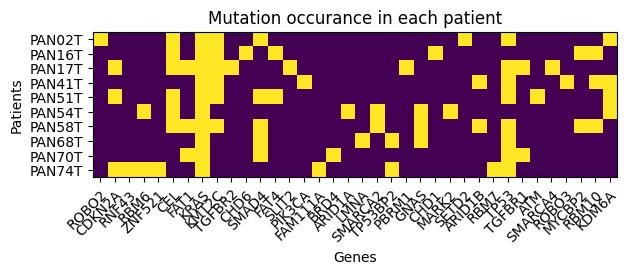

In [21]:
###convert mutation dictionary to pandas dataframe

def gather_all_genes(mut_dict):
    mut_gene = []
    for patient in mut_dict.keys():
        mut_gene += mut_dict[patient].tolist()
    return(np.array(list(set(mut_gene))))
def create_datafreme(mut_dict):
    all_genes = gather_all_genes(mut_dict)
    dict_dataframe = {}
    for patient in mut_dict.keys():
        dict_dataframe[patient] = []
        for gene in all_genes:
            if gene in mut_dict[patient]:
                dict_dataframe[patient].append(True)
            else:
                dict_dataframe[patient].append(False)
    df = pd.DataFrame(dict_dataframe)
    df.index = all_genes
    return(df.T)
x = create_datafreme(mutations_patient)
plot_mut(x, x.columns, x.index, 'sdfwsd')


In [9]:
mutations_patient

{'PAN02T': array(['KRAS', 'TP53', 'CEL', 'CEL', 'CEL', 'CEL', 'KMT2C', 'KMT2C',
        'KMT2C', 'KMT2C', 'SMAD4', 'KDM6A', 'ROBO2', 'SETD2'], dtype=object),
 nan: array([], dtype=object),
 'PAN16T': array(['KRAS', 'CEL', 'KMT2C', 'KMT2C', 'KMT2C', 'CHD1', 'CHD6', 'FAT4',
        'MYCBP2', 'RBM10'], dtype=object),
 'PAN17T': array(['KRAS', 'TP53', 'CEL', 'CEL', 'CEL', 'KMT2C', 'CDKN2A', 'FAT1',
        'PBRM1', 'SLIT2', 'SMARCA4', 'TGFBR1', 'TGFBR2'], dtype=object),
 'PAN41T': array(['KRAS', 'TP53', 'KMT2C', 'KMT2C', 'KMT2C', 'ARID1B', 'ARID1B',
        'KDM6A', 'PIK3CA', 'RBM10', 'ROBO3'], dtype=object),
 'PAN51T': array(['KRAS', 'TP53', 'CEL', 'CDKN2A', 'KMT2C', 'SMAD4', 'ATM', 'FAT4',
        'KDM6A'], dtype=object),
 'PAN54T': array(['KRAS', 'CEL', 'ARID1A', 'GNAS', 'KDM6A', 'MARK2', 'RBM6',
        'SMARCA2'], dtype=object),
 'PAN58T': array(['KRAS', 'TP53', 'CEL', 'KMT2C', 'SMAD4', 'ARID1B', 'FAT1', 'GNAS',
        'MYCBP2', 'RBM10', 'SMARCA2'], dtype=object),
 'PAN68T': array(['

In [8]:
x

RBM6  TGFBR2  ZNF521  ROBO2   CHD6   GNAS   BRD4  SETD2  SMARCA4  \
PAN02T  False   False   False   True  False  False  False   True    False   
NaN     False   False   False  False  False  False  False  False    False   
PAN16T  False   False   False  False   True  False  False  False    False   
PAN17T  False    True   False  False  False  False  False  False     True   
PAN41T  False   False   False  False  False  False  False  False    False   
PAN51T  False   False   False  False  False  False  False  False    False   
PAN54T   True   False   False  False  False   True  False  False    False   
PAN58T  False   False   False  False  False   True  False  False    False   
PAN68T  False   False   False  False  False   True  False  False    False   
PAN70T  False   False   False  False  False  False   True  False    False   
PAN74T   True   False    True  False  False  False  False  False    False   

         RBM7  ...  SLIT2  MARK2   KRAS  RBM10    CEL    ATM  SMARCA2  SMAD4  \
PAN02T  False  ...  False  False   True  False   True  False    False   True   
NaN     False  ...  False  False  False  False  False  False    False  False   
PAN16T  False  ...  False  False   True   True   True  False    False  False   
PAN17T  False  ...   True  False   True  False   True  False    False  False   
PAN41T  False  ...  False  False   True   True  False  False    False  False   
PAN51T  False  ...  False  False   True  False   True   True    False   True   
PAN54T  False  ...  False   True   True  False   True  False     True  False   
PAN58T  False  ...  False  False   True   True   True  False     True   True   
PAN68T  False  ...  False  False   True  False  False  False    False   True   
PAN70T  False  ...  False  False   True  False  False  False    False   True   
PAN74T   True  ...  False  False   True  False  False  False    False  False   

         FAT1   LMNA  
PAN02T  False  False  
NaN     False  False  
PAN16T  False  False  
PAN17T   True  False  
PAN41T  False  False  
PAN51T  False  False  
PAN54T  False  False  
PAN58T   True  False  
PAN68T  False   True  
PAN70T   True  False  
PAN74T  False  False  

[11 rows x 36 columns]

In [36]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import pandas as pd
import plotly.express as px
from glob import glob
import plotly.io as pio

#df.filter(like='a')
# Example data generation
np.random.seed(0)  # For reproducibility
paths = glob('/user/sina.garazhian/u12203/viability_data/pancrea/*.txt')
for path in paths:
    data = []
    therapy = path.split('/')[-1].split('.')[0]
    viab_data = pd.read_csv(path, sep = '\t')
    groups = ["PAN02T", "PAN16T", "PAN17T", "PAN41T", "PAN51T", "PAN54T", "PAN58T", "PAN70T", "PAN74T"]
    subgroups = list(viab_data['[nM]'].values)
    print(groups)
    # Create 9 groups, each with 5 subgroups, and each subgroup has 3 numerical values
    for group in groups:  # 9 groups
        for subgroup in subgroups:  # 5 subgroups per group
            tmp = viab_data.loc[viab_data['[nM]'] == subgroup, :].filter(like=group)
            measures = tmp.iloc[:,:].values.ravel()
            for value in measures:  # 3 numerical values per subgroup
                numerical_value = value  # Random numerical value
                data.append([group, subgroup, numerical_value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Patient', 'Dose', 'Viability'])

    # Plot the box plot using Plotly, with subgroups differentiated by color
    fig = px.box(df, x='Patient', y='Viability', color='Dose', title=f'Viability measurments for Different Patients and Dosages of {therapy}')
    #fig.write_image(f'/user/sina.garazhian/u12203/pancras_res/viab_{therapy}.png')
    pio.write_image(fig, f'/user/sina.garazhian/u12203/pancras_res/viab_{therapy}.png')
    fig.show()


['PAN02T', 'PAN16T', 'PAN17T', 'PAN41T', 'PAN51T', 'PAN54T', 'PAN58T', 'PAN70T', 'PAN74T']


['PAN02T', 'PAN16T', 'PAN17T', 'PAN41T', 'PAN51T', 'PAN54T', 'PAN58T', 'PAN70T', 'PAN74T']


['PAN02T', 'PAN16T', 'PAN17T', 'PAN41T', 'PAN51T', 'PAN54T', 'PAN58T', 'PAN70T', 'PAN74T']


['PAN02T', 'PAN16T', 'PAN17T', 'PAN41T', 'PAN51T', 'PAN54T', 'PAN58T', 'PAN70T', 'PAN74T']


['PAN02T', 'PAN16T', 'PAN17T', 'PAN41T', 'PAN51T', 'PAN54T', 'PAN58T', 'PAN70T', 'PAN74T']


['PAN02T', 'PAN16T', 'PAN17T', 'PAN41T', 'PAN51T', 'PAN54T', 'PAN58T', 'PAN70T', 'PAN74T']


In [14]:
import gseapy as gp
###single sample gene set enrichment analysis
###REactome gene set
reactome = '/user/sina.garazhian/u12203/ReactomePathways.gmt'
ss_reac = gp.ssgsea(data=gen_ex_fil_trans,
               gene_sets=reactome,
               outdir=None,
               sample_norm_method='rank', # choose 'custom' will only use the raw value of `data`
               no_plot=True)

In [17]:
res_reac = ss_reac.res2d
nes_reac = res_reac.pivot(index='Term', columns='Name', values='NES')
nes_reac.insert(0,'Name', nes_reac.index)
nes_reac.head()

Name                                                                                             Name  \
Term                                                                                                    
A tetrasaccharide linker sequence is required f...  A tetrasaccharide linker sequence is required ...   
ABC transporter disorders                                                   ABC transporter disorders   
ABC transporters in lipid homeostasis                           ABC transporters in lipid homeostasis   
ABC-family proteins mediated transport                         ABC-family proteins mediated transport   
ADORA2B mediated anti-inflammatory cytokines pr...  ADORA2B mediated anti-inflammatory cytokines p...   

Name                                               TM023_Organoid_Pan002  \
Term                                                                       
A tetrasaccharide linker sequence is required f...              0.011606   
ABC transporter disorders                                       0.415582   
ABC transporters in lipid homeostasis                          -0.044656   
ABC-family proteins mediated transport                          0.382556   
ADORA2B mediated anti-inflammatory cytokines pr...              0.112237   

Name                                               TM026_Organoid_Pan016  \
Term                                                                       
A tetrasaccharide linker sequence is required f...              0.033348   
ABC transporter disorders                                       0.413235   
ABC transporters in lipid homeostasis                          -0.019972   
ABC-family proteins mediated transport                          0.382671   
ADORA2B mediated anti-inflammatory cytokines pr...              0.129898   

Name                                               TM027_Organoid_Pan017  \
Term                                                                       
A tetrasaccharide linker sequence is required f...              0.069694   
ABC transporter disorders                                       0.389821   
ABC transporters in lipid homeostasis                           0.031733   
ABC-family proteins mediated transport                          0.359915   
ADORA2B mediated anti-inflammatory cytokines pr...              0.121139   

Name                                               TM039_Organoid_Pan041  \
Term                                                                       
A tetrasaccharide linker sequence is required f...              0.036153   
ABC transporter disorders                                       0.360041   
ABC transporters in lipid homeostasis                           0.091858   
ABC-family proteins mediated transport                          0.330683   
ADORA2B mediated anti-inflammatory cytokines pr...              0.141309   

Name                                               TM047_Organoid_Pan051  \
Term                                                                       
A tetrasaccharide linker sequence is required f...              0.115413   
ABC transporter disorders                                        0.36422   
ABC transporters in lipid homeostasis                          -0.048559   
ABC-family proteins mediated transport                          0.329337   
ADORA2B mediated anti-inflammatory cytokines pr...              0.116909   

Name                                               TM050_Organoid_Pan054  \
Term                                                                       
A tetrasaccharide linker sequence is required f...              0.068601   
ABC transporter disorders                                       0.368142   
ABC transporters in lipid homeostasis                           0.063636   
ABC-family proteins mediated transport                          0.343545   
ADORA2B mediated anti-inflammatory cytokines pr...              0.152717   

Name                                               TM053_Organoid_

In [20]:
len(values)
nes_reac.shape

(1284, 10)

In [21]:
import plotly.graph_objs as go
import plotly.offline as pyo
import random
nes_reac = nes_reac.iloc[:50,:]
# Example data setup
groups = [i for i in nes_reac['Name']]  # 50 groups
samples_per_group = 9
categories = [i for i in nes_reac.columns[1:]]  # 9 categories

# Generating random continuous values and assigning categories for each group
values  = [nes_reac.loc[nes_reac['Name'] == gp, nes_reac.columns != 'Name'].to_numpy().tolist()[0] for gp in nes_reac['Name']]


sample_categories = [[i for i in nes_reac.columns[1:]] for _ in nes_reac['Name']]  # Assign categories

# Bar plot for group means
#group_means = [sum(group) / len(group) for group in values]  # Compute group means

#bar_trace = go.Bar(
#    x=groups,
#    y=group_means,
#    name='Group Means',
#    opacity=0.6
#)

# Define category colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'yellow']
category_colors = {}
for index, i in enumerate(categories):
    category_colors[i] = colors[index]


# Dot plot for individual sample values with categories
dot_traces = []
for i, group in enumerate(values):
    for j, category in enumerate(categories):
        # Filter samples that belong to the current category
        category_samples = [group[k] for k in range(samples_per_group) if sample_categories[i][k] == category]

        scatter_trace = go.Scatter(
            x=[groups[i]] * len(category_samples),  # Each sample's group label
            y=category_samples,  # Continuous values for samples in this category
            mode='markers',
            name=f'{category}',
            marker=dict(
                size=8,  # Size of dots
                color=category_colors[category],  # Color based on category
                line=dict(width=1, color='DarkSlateGrey')
            ),
            showlegend=(i == 0)  # Only show legend for the first group
        )
        dot_traces.append(scatter_trace)

# Combine bar and dot plots
fig = go.Figure(data= dot_traces)

# Update layout for better visualization
fig.update_layout(
    title='Single sample GSEA',
    xaxis_title='Hall-mark Gene Groups',
    yaxis_title='Normalised ES',
    barmode='group',
    xaxis_tickangle=-45,
    height=1600,
    width=1200
)

# Show plot
fig.show()


In [10]:
##Gene set enrichment analysis
gene_sets="KEGG_2016"
from gseapy import GSEA
gs = GSEA(data=gen_ex_fil_trans,
         gene_sets='/user/sina.garazhian/u12203/h.all.v2024.1.Hs.symbols.gmt',
         classes = li, # cls=class_vector
         # set permutation_type to phenotype if samples >=15
         permutation_type='gene_set',
         permutation_num=1000, # reduce number to speed up test
         outdir=None,
         method='signal_to_noise',
         threads=4, seed= 8)
gs.pheno_pos = "up"
gs.pheno_neg = "down"
gs.run()

/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:183: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_mean = df.groupby(by=classes, axis=1).mean(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:184: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=classes, axis=1).std(numeric_only=True)


In [22]:
terms = gs.res2d.Term
axs = gs.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )

NotImplementedError: not for ssgsea

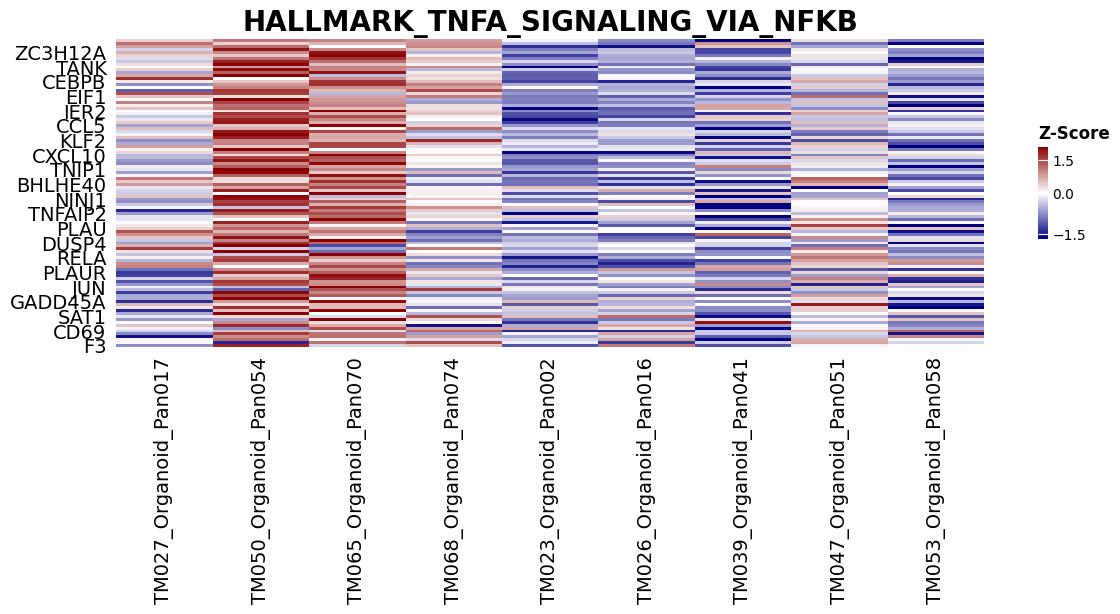

In [12]:
from gseapy import heatmap
# plotting heatmap
i = 0
genes = gs.res2d.Lead_genes[i].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
ax = heatmap(df = gs.heatmat.loc[genes], z_score=0, title=terms[i], figsize=(14,4))

/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


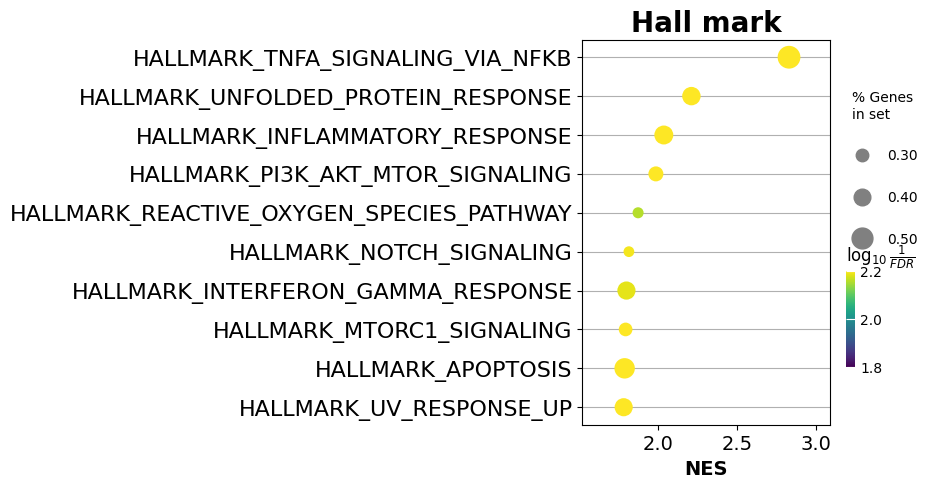

In [13]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(gs.res2d,
             column="FDR q-val",
             title='Hall mark',
             cmap=plt.cm.viridis,
             size=5,
             figsize=(4,5), cutoff=1)

For IKE

['up', 'up', 'down', 'up', 'down', 'up', 'up', 'down', 'down']


/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:183: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_mean = df.groupby(by=classes, axis=1).mean(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:184: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=classes, axis=1).std(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecate

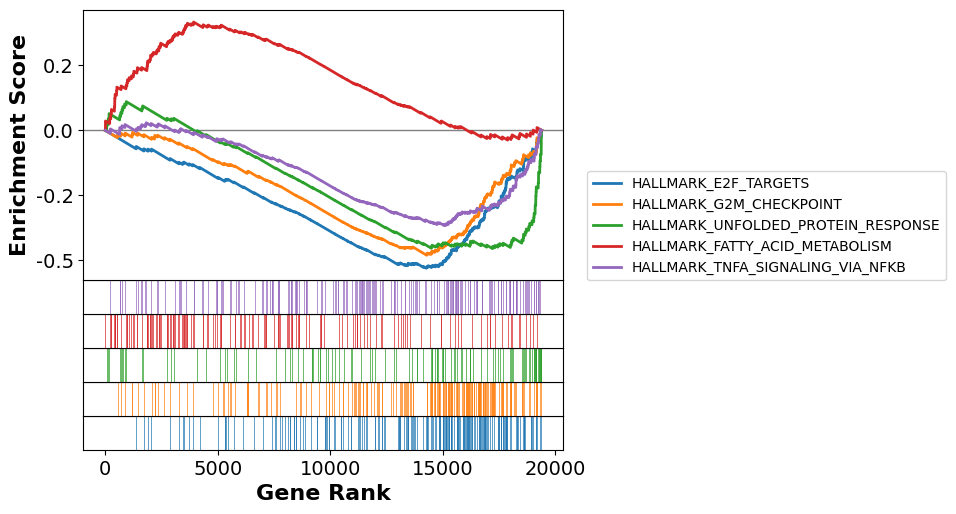

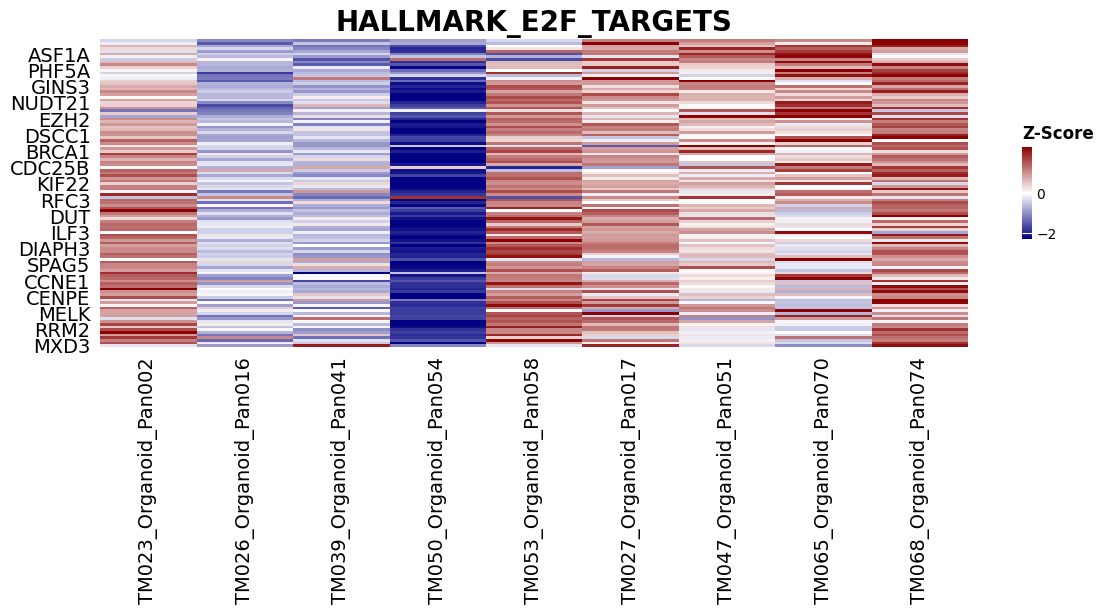

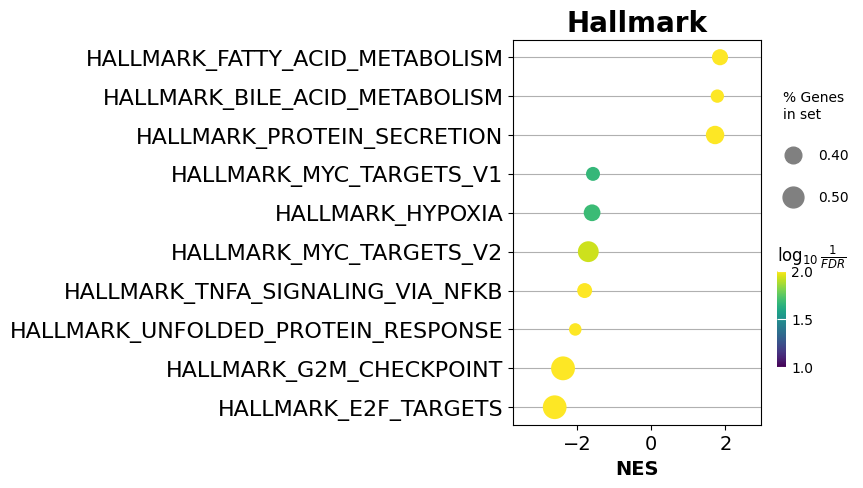

In [15]:
def do_gsna(viability_data, dose , rep = 3, gen_expression = gen_ex_fil_trans):
    new_viab_sorted = prepare_viab(viability_data, rep)
    li = create_list(new_viab_sorted, dose)
    print(li)
    gs = GSEA(data=gen_expression,
            gene_sets='/user/sina.garazhian/u12203/h.all.v2024.1.Hs.symbols.gmt',
            classes = li, # cls=class_vector
            # set permutation_type to phenotype if samples >=15
            permutation_type='gene_set',
            permutation_num=1000, # reduce number to speed up test
            outdir=None,
            method='signal_to_noise',
            threads=4, seed= 8)
    gs.pheno_pos = "up"
    gs.pheno_neg = "down"
    gs.run()
    terms = gs.res2d.Term
    axs = gs.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )
    # plotting heatmap
    i = 0
    genes = gs.res2d.Lead_genes[i].split(";")
    # Make sure that ``ofname`` is not None, if you want to save your figure to disk
    ax = heatmap(df = gs.heatmat.loc[genes], z_score=0, title=terms[i], figsize=(14,4))
    ax = dotplot(gs.res2d,
                column="FDR q-val",
                title='Hallmark',
                cmap=plt.cm.viridis,
                size=5,
                figsize=(4,5), cutoff=1)
viab_data = pd.read_csv("/user/sina.garazhian/u12203/viability_data/pancrea/IKE.txt", sep = '\t')
viab_data    
do_gsna(viab_data, [3333], 3, gen_ex_fil_trans)

for LB100

['down', 'up', 'down', 'down', 'down', 'up', 'up', 'down', 'down']


/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:183: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_mean = df.groupby(by=classes, axis=1).mean(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:184: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=classes, axis=1).std(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecate

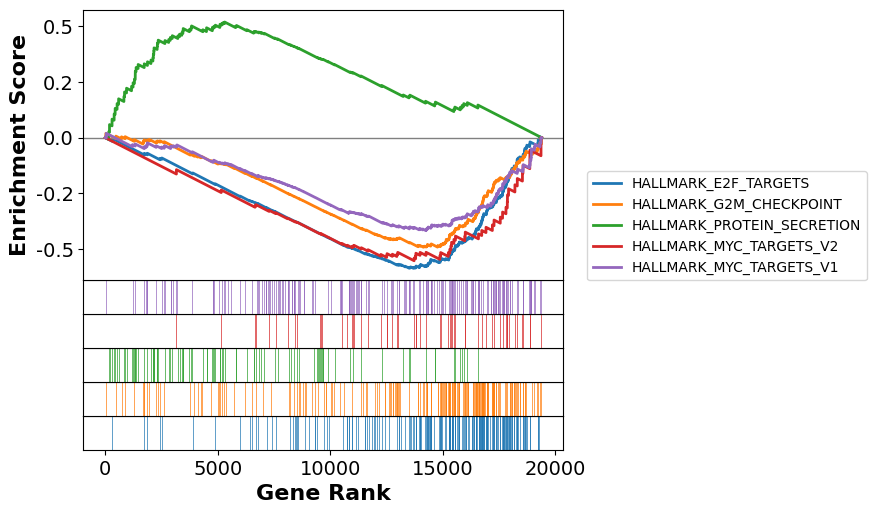

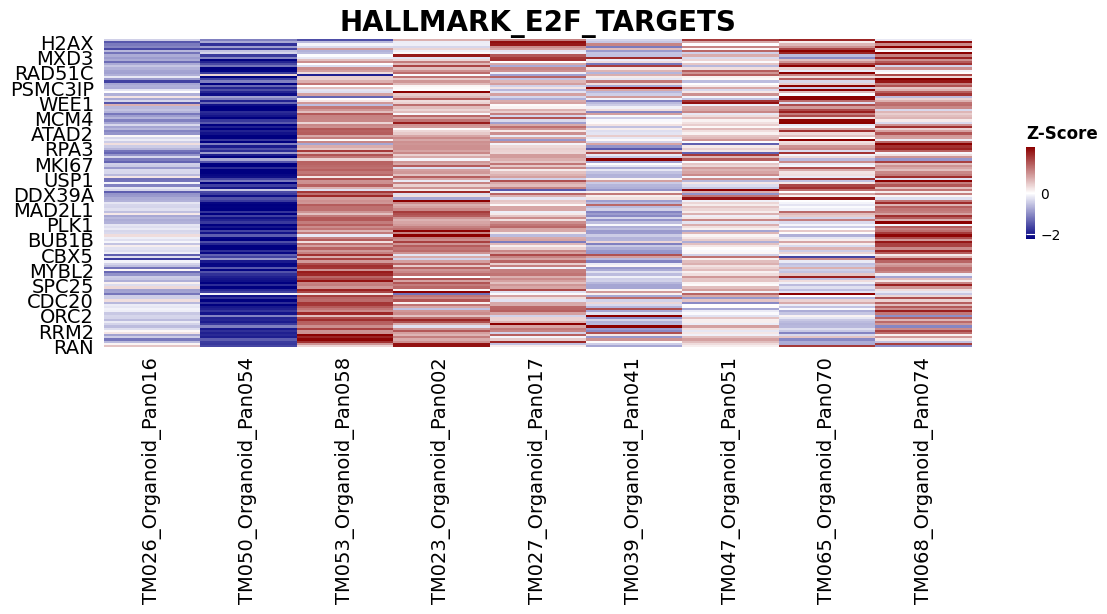

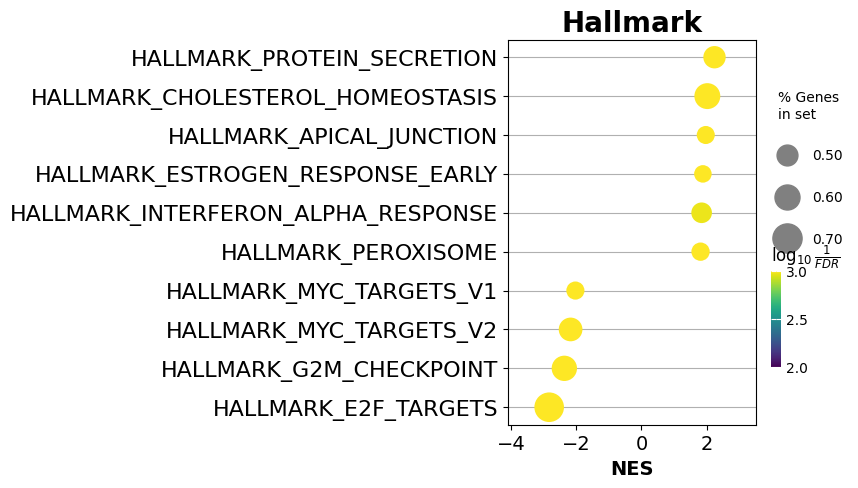

In [16]:
viab_data = pd.read_csv("/user/sina.garazhian/u12203/viability_data/pancrea/LB100.txt", sep = '\t')
doses = viab_data['[nM]'].to_list()[4:-1]
doses
do_gsna(viab_data, doses, 3,gen_ex_fil_trans)

For MRTX1133


['down', 'up', 'up', 'up', 'up', 'down', 'up', 'down', 'down']


/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:183: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_mean = df.groupby(by=classes, axis=1).mean(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:184: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=classes, axis=1).std(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecate

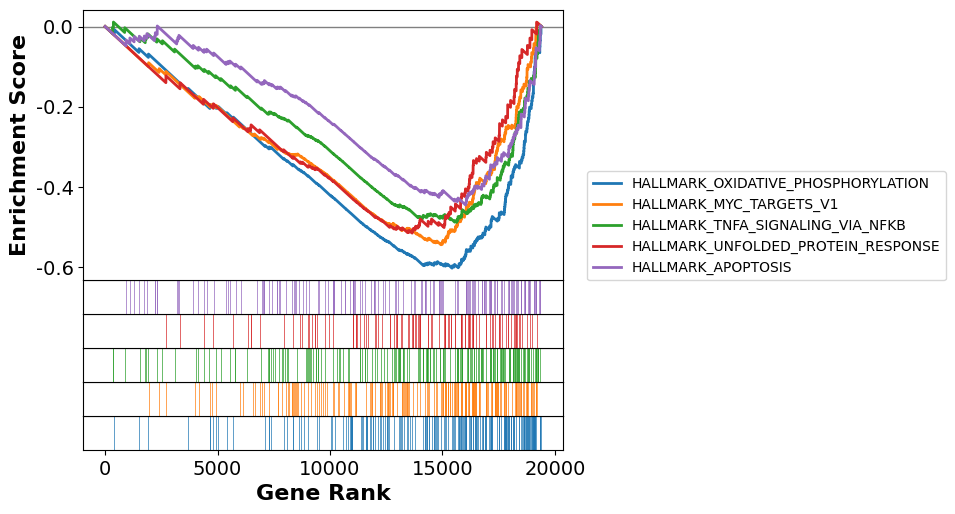

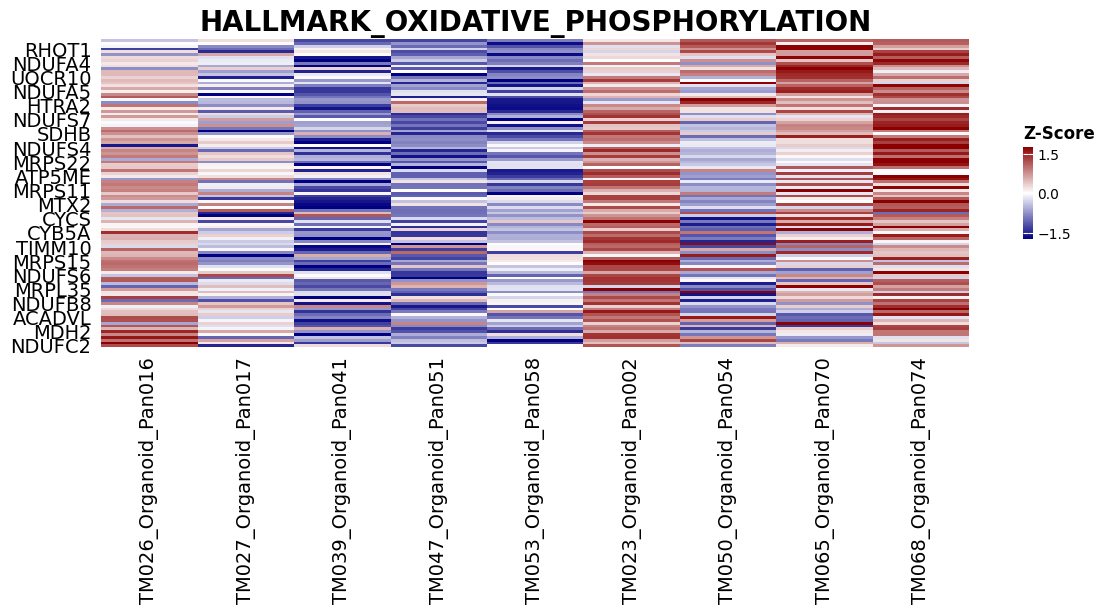

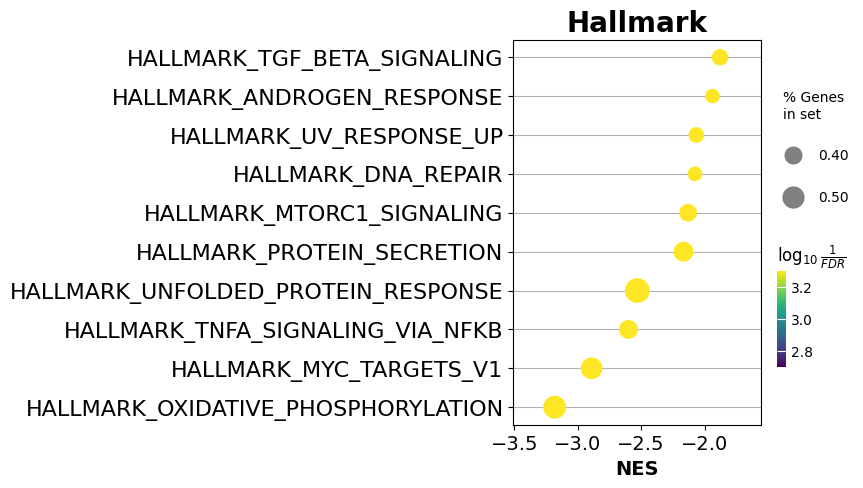

In [17]:
viab_data = pd.read_csv("/user/sina.garazhian/u12203/viability_data/pancrea/MRTX1133.txt", sep = '\t')
doses = viab_data['[nM]'].to_list()[4:-1]
doses
do_gsna(viab_data, doses, 3,gen_ex_fil_trans)

For PF37..._500uM

['up', 'up', 'up', 'down', 'up', 'up', 'down', 'down']


/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:183: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_mean = df.groupby(by=classes, axis=1).mean(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:184: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=classes, axis=1).std(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecate

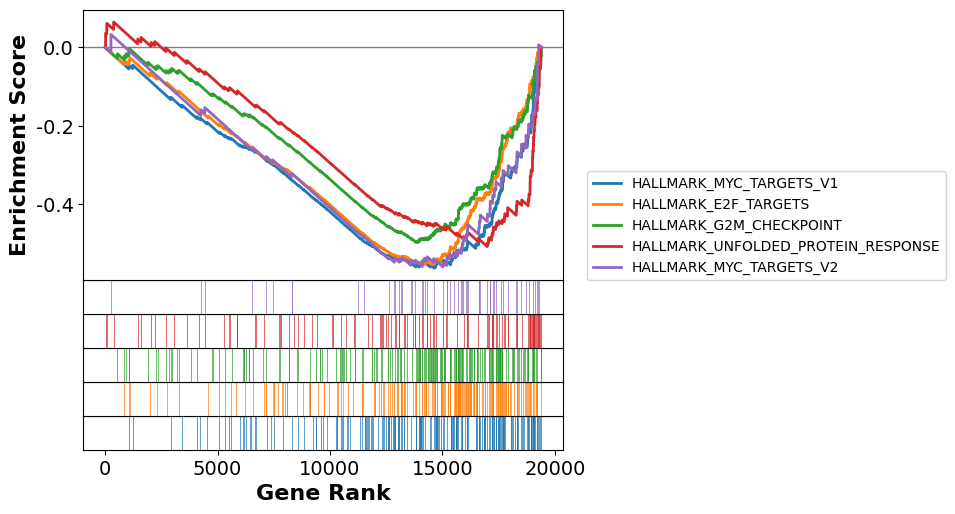

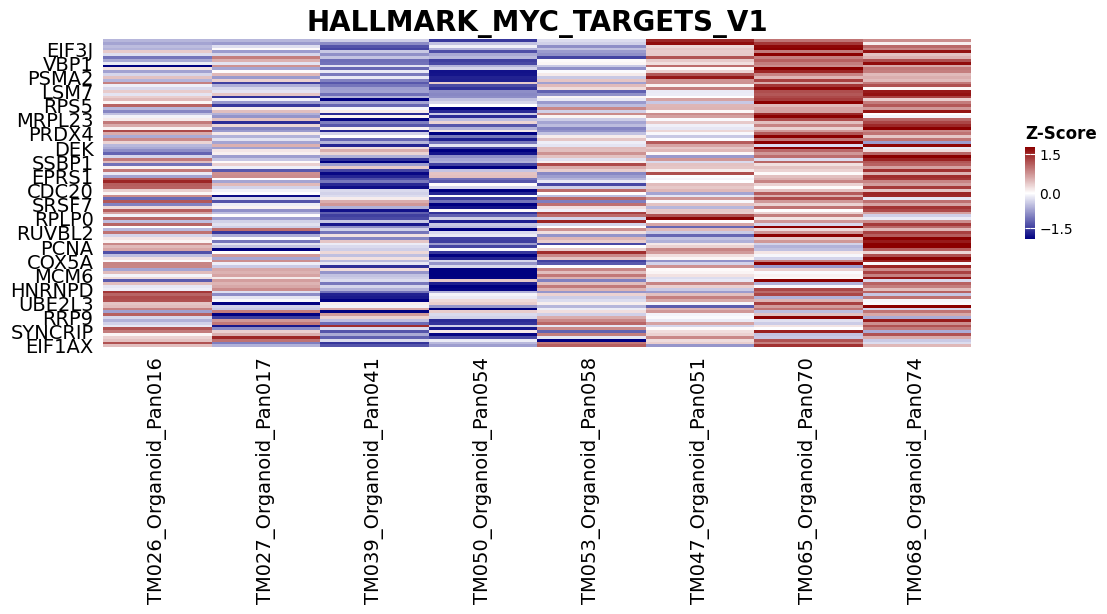

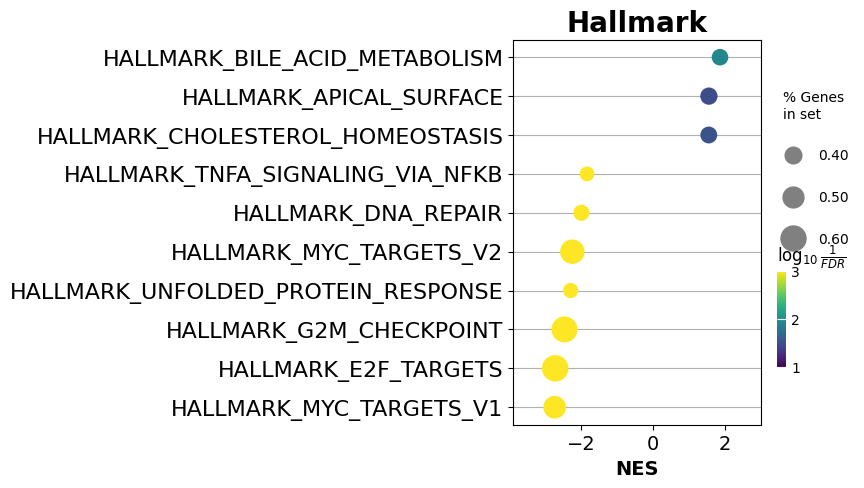

In [18]:
viab_data = pd.read_csv("/user/sina.garazhian/u12203/viability_data/pancrea/PF3758309_500 uM.txt", sep = '\t')
doses = viab_data['[nM]'].to_list()[5:-1]
doses
do_gsna(viab_data, doses, 3,gen_ex_fil_trans)

For Sotorasib

['up', 'up', 'down', 'up', 'down', 'down', 'down', 'down']


/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:183: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_mean = df.groupby(by=classes, axis=1).mean(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/gsea.py:184: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=classes, axis=1).std(numeric_only=True)
/user/sina.garazhian/u12203/miniconda3/envs/general/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecate

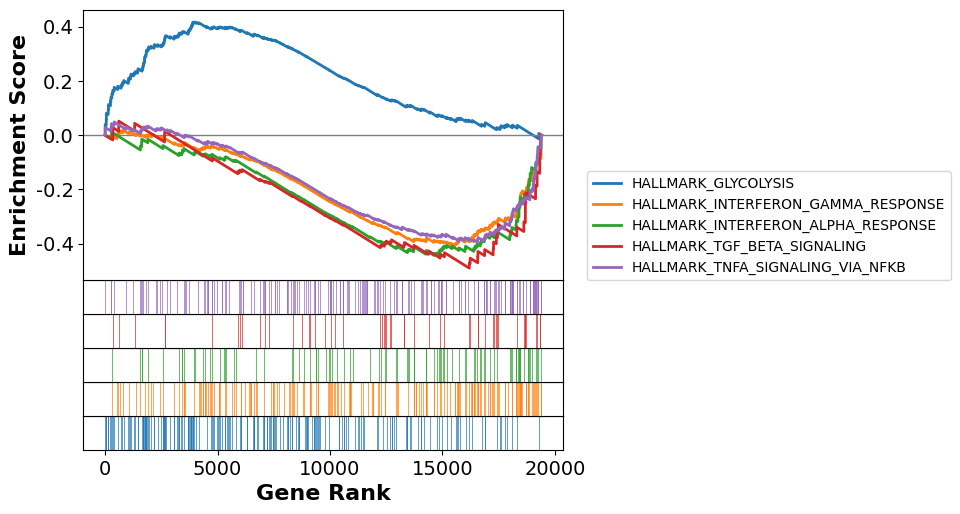

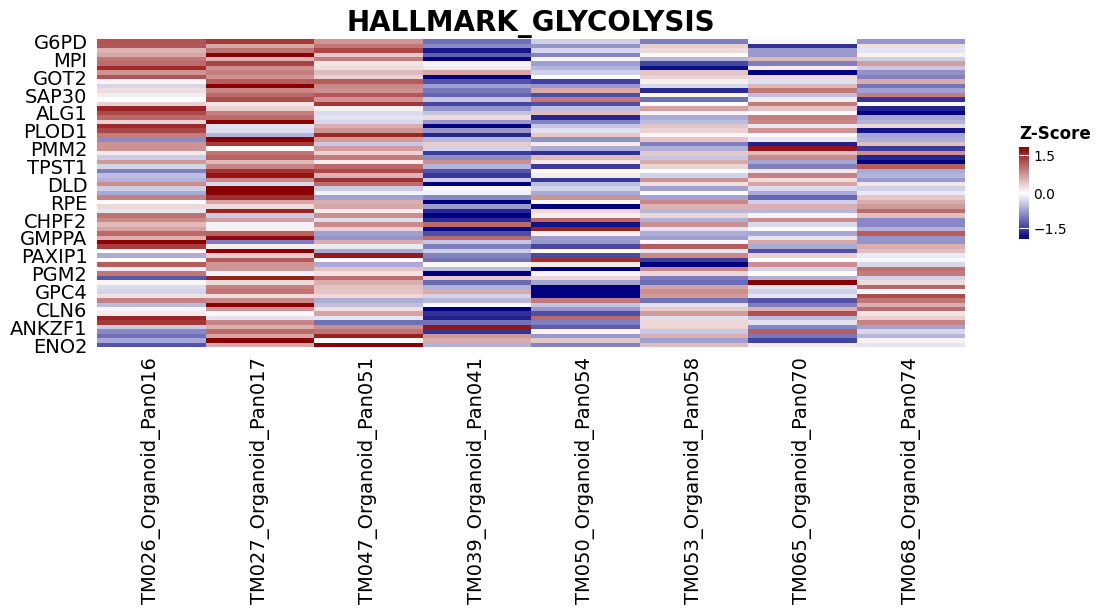

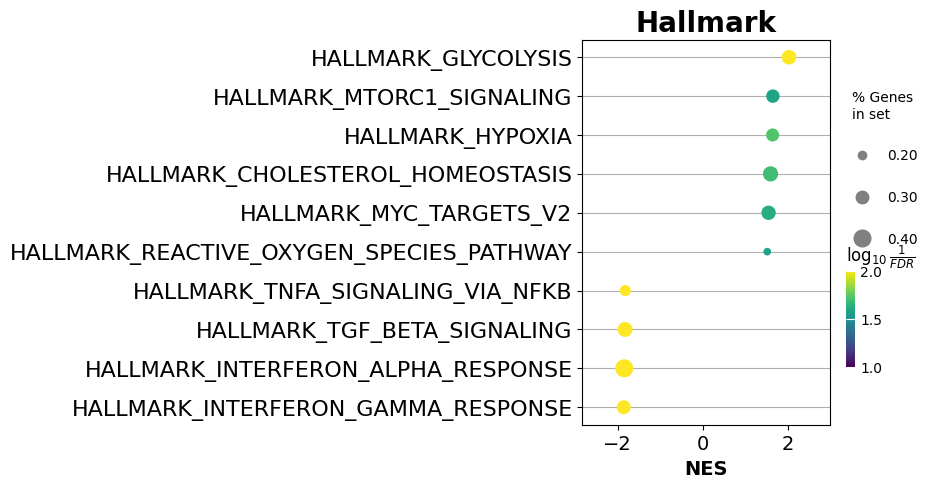

In [19]:
viab_data = pd.read_csv("/user/sina.garazhian/u12203/viability_data/pancrea/Sotorasib.txt", sep = '\t')
doses = viab_data['[nM]'].to_list()[5:-1]
doses
do_gsna(viab_data, doses, 3,gen_ex_fil_trans)

In [6]:
##Preparing the viability measurments. getting average across three replicates
#viab_data = pd.read_csv("/user/sina.garazhian/u12203/viability_data/pancrea/Folfirinox.txt", sep = '\t')
def prepare_viab(viab_df, rep = 3):
    new_viab = pd.DataFrame()
    column_uniq = list(set([i.split('.')[0][:3].capitalize() + '0' + i.split('.')[0][3:-1].capitalize() for i in viab_data.columns[1:]]))
    new_viab['dosage'] = viab_data['[nM]']
    for i in column_uniq:
        new_viab[i] = viab_data[i[0:3].upper() + i[4:] + 'T'] + sum([viab_data[i[0:3].upper() + i[4:] + 'T.{}'.format(j)] for j in range(1,rep)])
        new_viab[i]/=3
    new_viab_sorted = new_viab.reindex(sorted(new_viab.columns), axis=1)
    return(new_viab_sorted)
#new_viab_sorted = prepare_viab(viab_data)


##Creating the phenotype list
def create_list(data, dose, thresh = 50):
    #emp_list = [i for i in data.columns[1:] if data.loc[data['dosage'] == dose,i] >= thresh]
    final_list = []
    for i in data.columns[0:-1]:
        if np.mean(data.loc[data['dosage'].isin(dose),i].values) >= thresh:
            final_list.append('up')
        else:
            final_list.append('down')
    return(final_list)

In [32]:
###plot heatmap
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl
def plot(data, columns, rows, drug):
        


    data = data.to_numpy()
    fig, ax = plt.subplots()
    plt.xlabel('Dosage [uM]')
    plt.ylabel('Threshold')
    im = ax.imshow(data)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(columns)), labels=columns)
    ax.set_yticks(np.arange(len(rows)), labels=rows)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(columns)):
        for j in range(len(rows)):
            text = ax.text(i, j, data[j, i],
                        ha="center", va="center", color="w")

    ax.set_title("amount of patients in one group for {}(there are 9 patients in total)".format(drug))
    fig.tight_layout()
    plt.savefig(f"/user/sina.garazhian/u12203/pancras_res/group_member_{drug}.png")
    plt.show()

/user/sina.garazhian/u12203/viability_data/pancrea/Folfirinox.txt


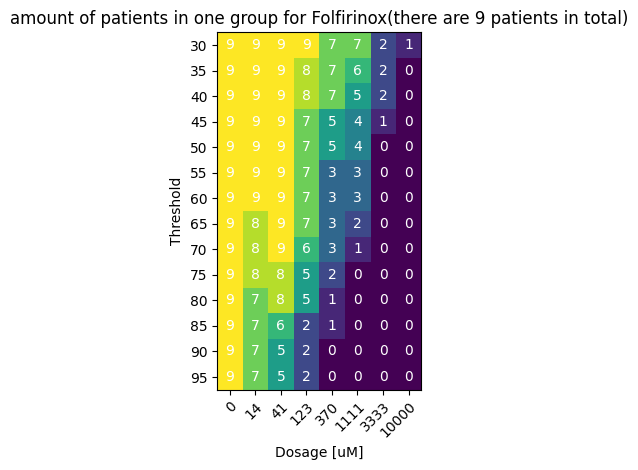

/user/sina.garazhian/u12203/viability_data/pancrea/IKE.txt


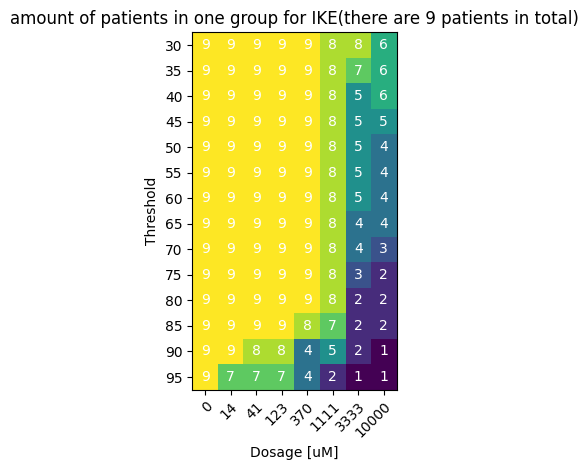

/user/sina.garazhian/u12203/viability_data/pancrea/LB100.txt


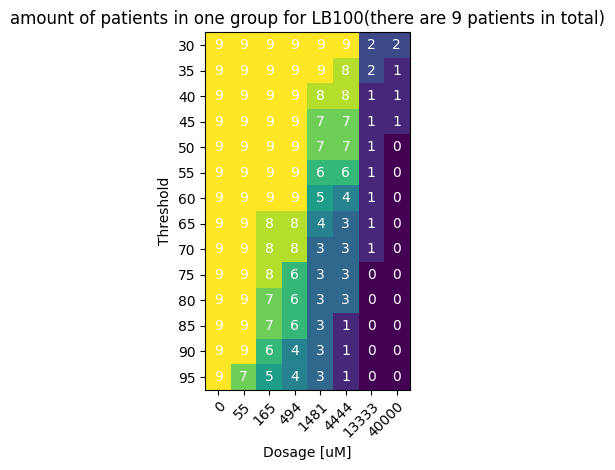

/user/sina.garazhian/u12203/viability_data/pancrea/MRTX1133.txt


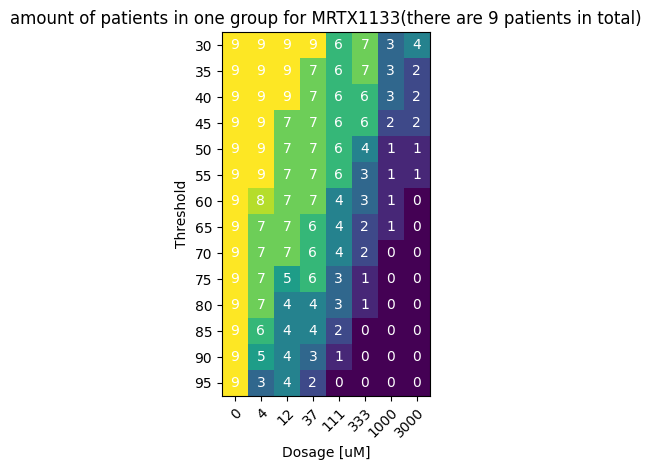

/user/sina.garazhian/u12203/viability_data/pancrea/PF3758309_500 uM.txt


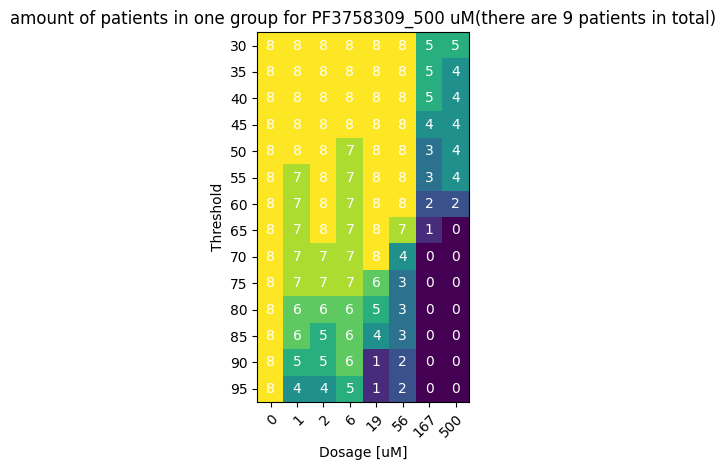

/user/sina.garazhian/u12203/viability_data/pancrea/Sotorasib.txt


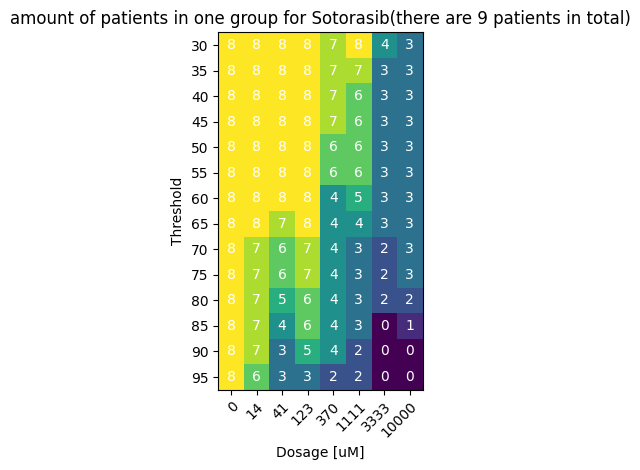

In [33]:
###investigate different dosages and thresholds
from glob import glob
import pandas as pd

drugs_paths = glob("/user/sina.garazhian/u12203/viability_data/pancrea/*.txt")
for path in drugs_paths:
    print(path)
    drug = path.split('/')[-1].split('.')[0]
    #path = "/user/sina.garazhian/u12203/viability_data/pancrea/Folfirinox.txt"
    viab_data = pd.read_csv(path, sep = '\t')
    new_viab_data = prepare_viab(viab_data)
    emp_data = pd.DataFrame(columns=viab_data['[nM]'].to_list())
    k = 0
    for j in range(30,100,5):
        new_row = []
        for i in viab_data['[nM]']:
            li = create_list(new_viab_data, [i], j)
            new_row.append(sum([viab == 'up' for viab in li]))
        emp_data.loc[k] = new_row
        k += 1
    emp_data.index = range(30,100,5)
    plot(emp_data, emp_data.columns, emp_data.index, drug)
    

Analysis for drug combinations